In [139]:
from sympy import I, symbols, integrate, exp, pi, expand, sin, cos, lambdify, trigsimp
import numpy as np
from matplotlib import pyplot as plt

In [108]:
f_n, t, m, n, theta = symbols("f_n t m n \\theta", real=True)

In [46]:
e1 = exp(-I*2*pi*f_n*t)
e1

exp(-2*I*pi*f_n*t)

In [115]:
integrate(sin(m*theta)* sin(n*theta), theta)

Piecewise((0, Eq(m, 0) & Eq(n, 0)), (-\theta*sin(\theta*n)**2/2 - \theta*cos(\theta*n)**2/2 + sin(\theta*n)*cos(\theta*n)/(2*n), Eq(m, -n)), (\theta*sin(\theta*n)**2/2 + \theta*cos(\theta*n)**2/2 - sin(\theta*n)*cos(\theta*n)/(2*n), Eq(m, n)), (-m*sin(\theta*n)*cos(\theta*m)/(m**2 - n**2) + n*sin(\theta*m)*cos(\theta*n)/(m**2 - n**2), True))

In [114]:
integrate(sin(n*theta)* sin(n*theta), theta)

Piecewise(((\theta*n/2 - sin(\theta*n)*cos(\theta*n)/2)/n, Ne(n, 0)), (0, True))

In [116]:
integrate(sin(n*theta)* sin(n*theta), (theta, -pi, pi))

Piecewise((-(-pi*n/2 + sin(pi*n)*cos(pi*n)/2)/n + (pi*n/2 - sin(pi*n)*cos(pi*n)/2)/n, Ne(n, 0)), (0, True))

In [117]:
integrate(cos(n*theta)* cos(n*theta), (theta, -pi, pi))

Piecewise((-(-pi*n/2 - sin(pi*n)*cos(pi*n)/2)/n + (pi*n/2 + sin(pi*n)*cos(pi*n)/2)/n, Ne(n, 0)), (2*pi, True))

In [141]:
ea1 = integrate(e1*sin(t), (t, -pi, pi))
ea1

Piecewise((I*pi, Eq(f_n, -1/(2*pi))), (-I*pi, Eq(f_n, 1/(2*pi))), (-1/(4*pi**2*f_n**2*exp(2*I*pi**2*f_n) - exp(2*I*pi**2*f_n)) + 1/(4*pi**2*f_n**2*exp(-2*I*pi**2*f_n) - exp(-2*I*pi**2*f_n)), True))

In [142]:
ea1 = integrate(e1*sin(2*t), (t, -pi, pi))
ea1

Piecewise((-I*pi, Eq(f_n, 1/pi)), (I*pi, Eq(f_n, -1/pi)), (1/(2*pi**2*f_n**2*exp(2*I*pi**2*f_n) - 2*exp(2*I*pi**2*f_n)) - 1/(2*pi**2*f_n**2*exp(-2*I*pi**2*f_n) - 2*exp(-2*I*pi**2*f_n)), True))

In [119]:
integrate(sin(2*theta)*sin(2*theta), (theta, -pi, pi))

pi

In [120]:
integrate(cos(2*theta)*cos(2*theta), (theta, -pi, pi))

pi

In [122]:
integrate(exp(I*m*theta)*exp(I*n*theta), (theta, -pi- pi))

Piecewise((-I*exp(-2*I*pi*m)*exp(-2*I*pi*n)/(m + n), Ne(m, -n)), (-2*pi, True))

In [124]:
integrate(exp(I*n*theta)*exp(I*n*theta), (theta, -pi- pi)).rewrite(sin)

Piecewise((-I*(-I*sin(4*pi*n) + cos(4*pi*n))/(2*n), Ne(2*n, 0)), (-2*pi, True))

In [99]:
ea2 = ea1.args[0].args[0].rewrite(sin).expand()
ea2

sin(4*pi**2*f_n)/(2*pi*f_n)

In [103]:
ea2.subs(f_n, n/(pi))

sin(4*pi*n)/(2*n)

In [133]:
res = integrate(exp(I*(m+n)*theta), (theta, -pi,pi))
res

-I*exp(I*pi*m)*exp(I*pi*n)/(m + n) + I*exp(-I*pi*m)*exp(-I*pi*n)/(m + n)

In [136]:
e2 = res
e2

-I*exp(I*pi*m)*exp(I*pi*n)/(m + n) + I*exp(-I*pi*m)*exp(-I*pi*n)/(m + n)

In [137]:
e4 =e2.rewrite(cos)
e4

I*(-I*sin(pi*m) + cos(pi*m))*(-I*sin(pi*n) + cos(pi*n))/(m + n) - I*(I*sin(pi*m) + cos(pi*m))*(I*sin(pi*n) + cos(pi*n))/(m + n)

In [138]:
e5 = e4.expand()
e5

2*sin(pi*m)*cos(pi*n)/(m + n) + 2*sin(pi*n)*cos(pi*m)/(m + n)

In [140]:
trigsimp(e5)

2*sin(pi*(m + n))/(m + n)

In [69]:
fn = lambdify(n, e5.subs(pi, np.pi))

In [72]:
fn(3)

-0.6666666666666666

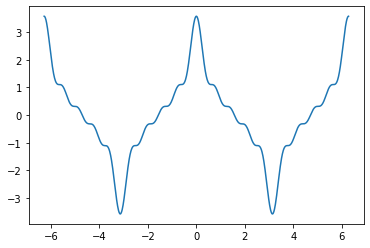

In [74]:
x = np.linspace(-2*np.pi, 2*np.pi, num=1000)
sgn = 1
y = np.zeros(1000)
for n1 in range(1, 10,2):
    y += fn(n1)*sgn*np.cos(n1*x)
    sgn *= -1
plt.plot(x,y)
